In [61]:
#Import the necessary packages 
import pandas as pd
import datetime as dt
import calendar
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import warnings
import itertools
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [62]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [63]:
retail = pd.read_csv("I:\\saledreg.csv")

In [64]:
retail.head()

,Reference,Date,Month,Party Name,Item Name,Billed Quantity,Rate,Amount,USD RATE,AMOUNT IN INR,Region,STATES
0,Apr18/USA/001,04/30/2018,04/18/2019,A and O,XR,58.0,15.0,870.0,66.47,57828.9,US,PA
1,Apr18/USA/001,04/30/2018,04/18/2019,A and O,XR,39.0,20.0,780.0,66.47,51846.6,US,PA
2,Apr18/USA/002,04/30/2018,04/18/2019,Albert Einstein_x000D_\n,CT,494.0,33.5,16549.0,66.47,1100012.03,US,US
3,Apr18/USA/002,04/30/2018,04/18/2019,Albert Einstein_x000D_\n,MR,3.0,50.0,150.0,66.47,9970.5,US,US
4,Apr18/USA/002,04/30/2018,04/18/2019,Albert Einstein_x000D_\n,US,44.0,33.5,1474.0,66.47,97976.78,US,US


In [65]:
newdata = retail[['Date', 'Party Name', 'Item Name','Billed Quantity','Amount','STATES']].copy()

In [66]:
newdata.isnull().sum()
newdata.dropna(how='any',inplace=True)     

Date                0
Party Name          0
Item Name           0
Billed Quantity    10
Amount              8
STATES              0
dtype: int64

In [67]:
newdata.head()

,Date,Party Name,Item Name,Billed Quantity,Amount,STATES
0,04/30/2018,A and O,XR,58.0,870.0,PA
1,04/30/2018,A and O,XR,39.0,780.0,PA
2,04/30/2018,Albert Einstein_x000D_\n,CT,494.0,16549.0,US
3,04/30/2018,Albert Einstein_x000D_\n,MR,3.0,150.0,US
4,04/30/2018,Albert Einstein_x000D_\n,US,44.0,1474.0,US


In [68]:
test1=newdata

In [69]:
test1['DoP'] = pd.to_datetime(test1['Date'])

In [70]:
test1.head()

,Date,Party Name,Item Name,Billed Quantity,Amount,STATES,DoP
0,04/30/2018,A and O,XR,58.0,870.0,PA,2018-04-30
1,04/30/2018,A and O,XR,39.0,780.0,PA,2018-04-30
2,04/30/2018,Albert Einstein_x000D_\n,CT,494.0,16549.0,US,2018-04-30
3,04/30/2018,Albert Einstein_x000D_\n,MR,3.0,150.0,US,2018-04-30
4,04/30/2018,Albert Einstein_x000D_\n,US,44.0,1474.0,US,2018-04-30


In [71]:
CT = test1.loc[test1['Item Name'] == 'CT']
US = test1.loc[test1['Item Name'] == 'US']

In [72]:
CT['DoP'].min(), CT['DoP'].max()

CT= CT.groupby('DoP')['Amount'].sum().reset_index()
US= US.groupby('DoP')['Amount'].sum().reset_index()

(Timestamp('2018-04-30 00:00:00'), Timestamp('2019-03-31 00:00:00'))

In [73]:
CT.head(21)
US.head(21)

,DoP,Amount
0,2018-04-30,720108.13
1,2018-05-31,771750.83
2,2018-06-30,778530.44
3,2018-07-31,888788.06
4,2018-08-31,845214.06
5,2018-09-30,812679.69
6,2018-10-31,886955.25
7,2018-11-30,808863.77
8,2018-12-31,871853.17
9,2019-01-31,936919.55


,DoP,Amount
0,2018-04-30,87708.75
1,2018-05-31,90248.00
2,2018-06-30,86213.88
3,2018-07-31,95571.50
4,2018-08-31,97054.38
5,2018-09-30,87834.50
6,2018-10-31,90708.59
7,2018-11-30,87599.77
8,2018-12-31,95072.43
9,2019-01-31,113834.63


In [74]:
CT = CT.set_index('DoP')
US = US.set_index('DoP')
y_CT = CT['Amount'].resample('MS').mean()
y_US = US['Amount'].resample('MS').mean()
#y_US = US.set_index('DoP')

In [75]:
y_CT['2018':]
y_US['2018':]

DoP
2018-04-01     720108.13
2018-05-01     771750.83
2018-06-01     778530.44
2018-07-01     888788.06
2018-08-01     845214.06
2018-09-01     812679.69
2018-10-01     886955.25
2018-11-01     808863.77
2018-12-01     871853.17
2019-01-01     936919.55
2019-02-01     876367.26
2019-03-01    1028941.48
Freq: MS, Name: Amount, dtype: float64

DoP
2018-04-01     87708.75
2018-05-01     90248.00
2018-06-01     86213.88
2018-07-01     95571.50
2018-08-01     97054.38
2018-09-01     87834.50
2018-10-01     90708.59
2018-11-01     87599.77
2018-12-01     95072.43
2019-01-01    113834.63
2019-02-01     97744.73
2019-03-01    111762.50
Freq: MS, Name: Amount, dtype: float64

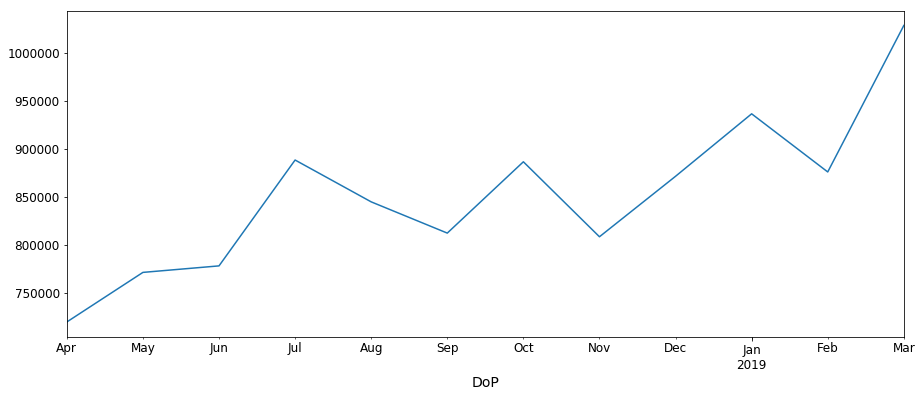

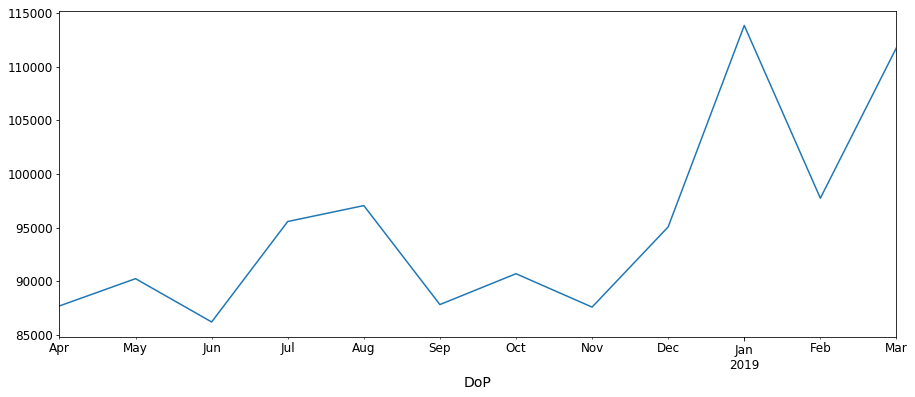

In [76]:
y_CT.plot(figsize=(15, 6))
plt.show()
y_US.plot(figsize=(15, 6))
plt.show()

In [77]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [78]:
mod = sm.tsa.statespace.SARIMAX(y_CT,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

ValueError: maxlag should be < nobs

In [ ]:
item_aggr = test1.groupby(['DoP', 'Item Name']).agg({'Billed Quantity': lambda x: x.sum(), # Total volume
                                        'Amount': lambda x: x.sum()}) # Monetary Value

In [ ]:
party_aggr= test1.groupby(['DoP', 'Party Name']).agg({'Billed Quantity': lambda x: x.sum(), # Total volume
                                        'Amount': lambda x: x.sum()}) # Monetary Value

In [ ]:
party_aggr.head(20)

In [ ]:
item_aggr.head(20)

In [ ]:
#Top revenue generating products
Products_by_Revenue = test1.groupby(by='Item Name')['Amount'].sum().sort_values(ascending=False)
Products_by_Revenue.head(10)

In [ ]:
#Bottom 10 products with respect to revenue
Products_by_Revenue.tail(10)

In [ ]:
#Top revenue generating customers
Customers_by_Revenue = test1.groupby(by='Party Name')['Amount'].sum().sort_values(ascending=False)
Customers_by_Revenue.head(10)

In [ ]:
#Bottom 10 customers
Customers_by_Revenue.tail(10)

In [ ]:
#Track the total sales month on month
Month_Wise_Monetary = test1.groupby(['DoP']).agg({'Amount': lambda x: x.sum()}) # Monetary Value

In [ ]:
%matplotlib inline
Month_Wise_Monetary.plot(kind="bar")